<a href="https://colab.research.google.com/github/Doda1979/PRPM/blob/main/Kinematicka_metoda_ram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Mezní plastická analýza rámové konstrukce

## Zadání
Konstrukce na obrázku je vyrobena z ideálně pružnoplastického materiálu.
Jednotlivé pruty mají po délce konstantní průřez s ohybovou tuhostí $EI~=~32$~MNm$^2$.
Mezní plastický moment sloupů (pruty 1-2 a 4-5) je $M_{pl} = 600$ kNm, pro zbytek konstrukce je $M_{pl} = 400$ kNm.

Konstrukce je zatížena třemi silami dle obrázku.

Proveďte analýzu tří kinematicky přípustných mechanismů.
Určete hodnotu síly $F$ v mezním plastickém stavu konstrukce a vykreslete odpovídající průběhy všech vnitřních sil (M, V, N).

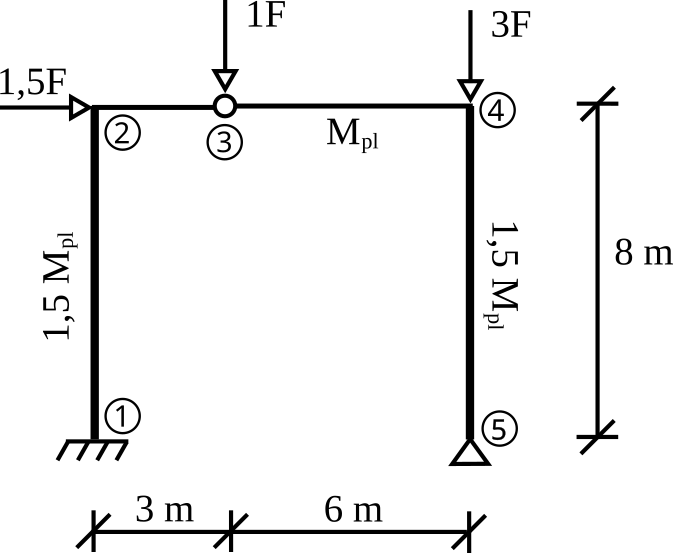

In [417]:
from IPython.display import display, Image
display(Image(filename="Ram_kinem_metoda_zadani.png", width=400))

Import potřebných knihoven

In [418]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

#!pip install sympy
from sympy import *
import sympy as smp

import matplotlib.patches as patches


## Řešení

Definice proměnných a jejich hodnot:

In [419]:
H = smp.symbols('H', real = True, positive = True)
L1 = smp.symbols('L1', real = True, positive = True)
L2 = smp.symbols('L2', real = True, positive = True)
# I = smp.symbols('I', real = True, positive = True)

F = smp.symbols('F', real = True)

# EI = smp.symbols('EI', real = True, positive = True)

M_pl = smp.symbols('M_pl', real = True, positive = True)

val_H = 8 # [m]
val_L1 = 3  # [m]
val_L2 = 6  # [m]
val_Mpl = 400 #[kNm]

Stupeň statické neurčitosti dané konstrukce je 1, pro vznik mechanismu tedy musí dojít k vytvoření dvou plastických kloubů (k vytvoření částečného mechanismu po vzniku jednoho plastického kloubu zde nedojde). Plastické klouby mohou vzniknout v přůřezech číslo 1, 2 a 4. Je proto potřeba vyšetřit 3 varianty (kombinace dvou míst ze tří možných).
Varianta A - vznik kloubu v průřezech 1 a 2,
varianta B - vznik kloubu v průřezech 1 a 4,
varianta C - vznik kloubu v průřezech 2 a 4.

Pro každý z mechanismů určíme velikost základní síly $F$ z rovnosti výkonu vnějších sil a disipačního výkonu $P_{ext} = D_{int}$.

### Varianta A - vznik plastických kloubů v průřezech 1 a 2

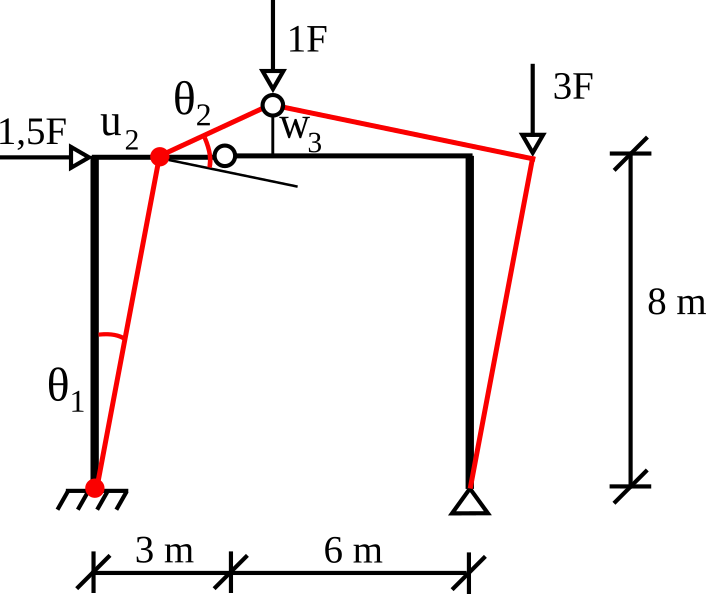

In [420]:
from IPython.display import display, Image
display(Image(filename="Ram_kinem_metoda_A.png", width=400))

Na obrázku je znázorněn kinematický mechnismus pro vznik plastických kloubů v místech 1 a 2. Ve styčníku 4 plastický kloub nevznikl, nedojde tam tedy ke vzájemnému natočení prutů, v tomto styčníku je proto zachován pravý úhel.  
Zapíšeme základní vztahy pro tento mechanismus:  
$\dot{\theta}_1 = \frac{\dot{u}_2}{8}\ \ $, odkud $\dot{u}_2 = 8\dot{\theta}_1$  
$\dot{\theta}_1 = \frac{\dot{w}_3}{6}\ \ $, odkud $\dot{w}_3 = 6\dot{\theta}_1$  

V tomto případě do výkonu vnějších sil přispívá kladně pouze vodorovná síla $1,\!5 F$, síla $1F$ podává záporný výkon a síla $3F$ pracuje na nulovém posunu.  
$P_{ext} = 1,\!5F \cdot \dot{u}_2 - 1F \dot{w}_3 = 1,\!5F \cdot 8\dot{\theta}_1 - F \cdot 6\dot{\theta}_1 = 6 F \dot{\theta}_1$

Dále vyjádříme disipační výkon (místa, kde dochází k disipaci jsou pro přehlednost vyznačena červeným obloučkem).  
V místě, kde se stýkají dva pruty s rozdílným plastickým momentem se plastický kloub vytvoří vždy na slabším z prutů, tedy na prutu s nižší hodnotou plastického momentu. V případě styčníku 2 se tudíž plastický kloub vytvoří na vodorovném prutu s plastickým momentem $M_{pl}$.  
$D_{int} = 1,\!5 M_{pl} \cdot \dot{\theta}_1 + M_{pl} \cdot (2\dot{\theta}_1 + \dot{\theta}_1) = 4,\!5 M_{pl} \cdot \dot{\theta}_1$

Z rovnosti $P_{ext} = D_{int}$ dostáváme velikost základní síly $F$ pro variantu A:

$6 \cdot F = 4,\!5 M_{pl}$

$F_A = \frac{4,5 M_pl}{6}$

In [421]:
val_F_A = 4.5 * val_Mpl / 6
print(f"Velikost základní síly pro variantu A je: F_A = {val_F_A:.3f} kN ")

Velikost základní síly pro variantu A je: F_A = 300.000 kN 


### Varianta B - vznik plastických kloubů v průřezech 1 a 4

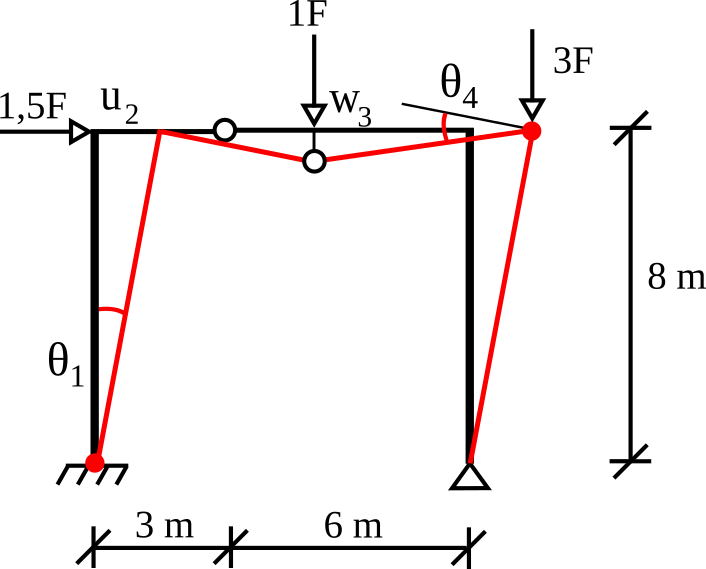

In [422]:
from IPython.display import display, Image
display(Image(filename="Ram_kinem_metoda_B.png", width=400))

Příslušný kinematický mechanismus je vykreslen na obrázku. Pro tento mechanismus opět vyjádříme zapíšeme základní vztahy:  
$\dot{\theta}_4 = 1,\!5 \dot{\theta}_1$  
$\dot{u}_2 = 8\dot{\theta}_1$  
$\dot{w}_3 = \frac{3}{8}\ \dot{u}_2 = 3\dot{\theta}_1$    

I v tomto případě pracuje síla $3F$ na nulovém posunu, zbývající dvě síly přispívají do výkonu vnějších sil kladně.  
$P_{ext} = 1,\!5F \cdot \dot{u}_2 + 1F \dot{w}_3 = 1,\!5F \cdot 8\dot{\theta}_1 + F \cdot 3\dot{\theta}_1 = 15 F \dot{\theta}_1$

Disipační výkon (místa, kde dochází k disipaci jsou pro přehlednost vyznačena červeným obloučkem).  
$D_{int} = 1,\!5 M_{pl} \cdot \dot{\theta}_1 + M_{pl} \cdot 1,\!5\dot{\theta}_1 = 3 M_{pl} \cdot \dot{\theta}_1$

Z rovnosti $P_{ext} = D_{int}$ dostáváme velikost základní síly $F$ pro vznik kinematického mechanismu B:

$15 \cdot F = 3 \cdot M_{pl}$

$F_B = \frac{3 M_pl}{15} = \frac{M_pl}{5}$

In [423]:
val_F_B = val_Mpl / 5
print(f"Velikost základní síly pro variantu B je: F_B = {val_F_B:.3f} kN ")

Velikost základní síly pro variantu B je: F_B = 80.000 kN 


### Varianta C - vznik kloubu v průřezech 2 a 4

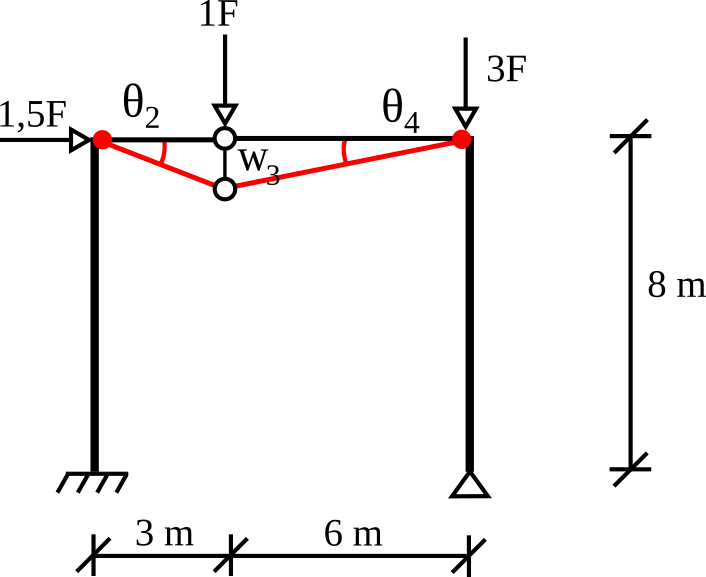

In [424]:
from IPython.display import display, Image
display(Image(filename="Ram_kinem_metoda_C.png", width=400))

Příslušný kinematický mechanismus je vykreslen na obrázku. Pro svislý posun styčníku 3 platí:  
$\dot{w}_3 = 3\dot{\theta}_2$    

Tentokrát podává kladný výkon pouze síla $1F$, ostatní dvě síly podávají výkon nulový. Zapíšeme výkon vnějších sil:   
$P_{ext} = F \cdot 3 \dot{\theta}_2$

Disipační výkon:  
$D_{int} = M_{pl} \cdot 1,\!5 \dot{\theta}_2$

Z rovnosti $P_{ext} = D_{int}$ dostáváme velikost základní síly $F$  pro vznik kinematického mechanismu C:

$3 \cdot F = 1,\!5 \cdot M_{pl}$

$F_C = \frac{1,5 M_pl}{3} = \frac{M_pl}{2}$

In [425]:
val_F_C = val_Mpl / 2
print(f"Velikost základní síly pro variantu C je: F_C = {val_F_C:.3f} kN ")

Velikost základní síly pro variantu C je: F_C = 200.000 kN 


###Určení rozhodujícího mechanismu:###

Skutečný machanismus kolapsu bude ten, ke kterému dojde při nejmenší hodnotě sil, tedy mechanismus s nejmenší hodnotou základní síly $F$.

In [426]:
# Nalezení minima a rozhodujícího mechanismu
values = {"A": val_F_A, "B": val_F_B, "C": val_F_C}
min_mechanism = min(values, key=values.get)
val_F = values[min_mechanism]

# Výstup
print(f"Rozhodující je mechanismus {min_mechanism} s velikostí základní síly = {val_F:.3f}.")

# Mezní hodnoty zatížení
print(f"Velikost síly 1,5F je {1.5*val_F:.3f} kN.")
print(f"Velikost síly 1F je {1*val_F:.3f} kN.")
print(f"Velikost síly 3F je {3*val_F:.3f} kN.")


Rozhodující je mechanismus B s velikostí základní síly = 80.000.
Velikost síly 1,5F je 120.000 kN.
Velikost síly 1F je 80.000 kN.
Velikost síly 3F je 240.000 kN.


###Dopočet vnitřních sil a momentů pro mezní plastický stav###

Při vykreslování průběhů vnitřních sil a momentů využijeme toho, že známe hodnotu momentu v místech vzniku plastických kloubů.

$M_2 = M_pl$

$M_4 = M_pl$

Ostatní hodnoty momentů a posouvajících sil pak dopočteme obvyklým způsobem z podmínek rovnováhy.
Kladnou orientaci svislých reakcí uvažujeme zdola nahoru, vodorovných reakcí z leva do prava a u momentových reakcí proti směru hodinových ručiček.

In [427]:
val_M1 = -1.5 * val_Mpl
print(f"Moment M1: {val_M1:.3f} kNm")
val_RM1 = -val_M1
print(f"Momentová reakce v levé podpoře RM1: {val_RM1:.3f} kN")
val_M4 = -val_Mpl
print(f"Moment M4: {val_M4:.3f} kNm")
val_M3 = 0
print(f"Moment M3: {val_M3:.3f} kNm")
val_M5 = 0
print(f"Moment M5: {val_M5:.3f} kNm")

# vodorovná reakce v podpoře 5:
val_R5x = val_M4 / 8
print(f"Vodorovná reakce v levé podpoře R5x: {val_R5x:.3f} kN")

# vodorovná reakce ve vetknutí (z vodorovné podm. rovnováhy)
val_R1x = -1.5*val_F - val_R5x
print(f"Vodorovná reakce ve vetknutí R1x: {val_R1x:.3f} kN")

val_M2 = val_M1 - val_R1x * 8
print(f"Moment M2: {val_M2:.3f} kNm")

# svislá reakce ve vetknutí (z momentové podmínky k bodu 2):
val_R1z = -val_M2 / 3
print(f"Svislá reakce ve vetknutí R1z: {val_R1z:.3f} kN")

# svislá reakce v podpoře 5 (ze svislé podm. rovnováhy):
val_R5z = val_F + 3*val_F - val_R1z
print(f"Svislá reakce v podpoře R5z: {val_R5z:.3f} kN")

# hodnoty posouvajících sil:
val_V12 = -val_R1x
val_V21 = val_V12
val_V23 = val_R1z
val_V32 = val_V23
val_V34 = val_V23 - val_F
val_V43 = val_V34
val_V54 = -val_R5x
val_V45 = val_V54

# hodnoty normálových sil:
val_N12 = -val_R1z
val_N21 = val_N12
val_N23 = -val_R5x - 1.5*val_F
val_N32 = val_N23
val_N34 = val_N23
val_N43 = val_N34
val_N54 = -val_R5z
val_N45 = val_N54

Moment M1: -600.000 kNm
Momentová reakce v levé podpoře RM1: 600.000 kN
Moment M4: -400.000 kNm
Moment M3: 0.000 kNm
Moment M5: 0.000 kNm
Vodorovná reakce v levé podpoře R5x: -50.000 kN
Vodorovná reakce ve vetknutí R1x: -70.000 kN
Moment M2: -40.000 kNm
Svislá reakce ve vetknutí R1z: 13.333 kN
Svislá reakce v podpoře R5z: 306.667 kN


**Vykreslení průběhu momentů**

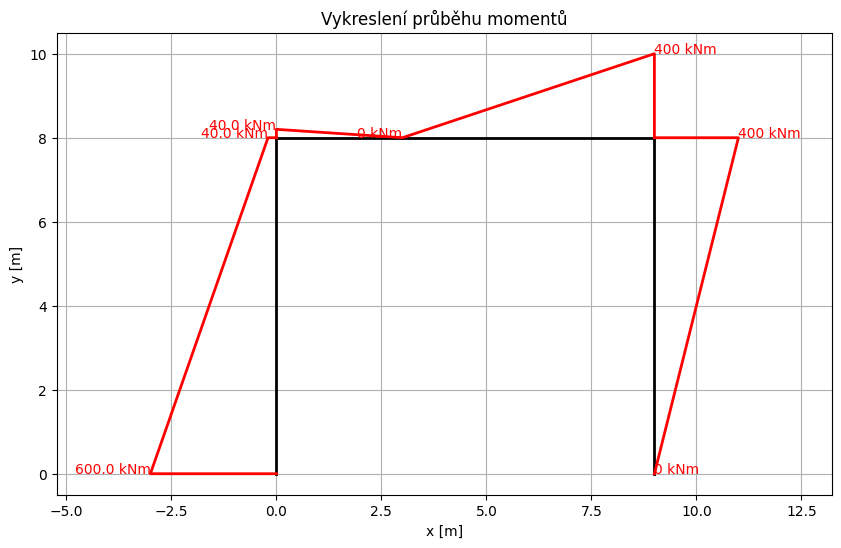

In [428]:
# Souřadnice styčníků (v metrech)
coordinates = {
    1: [0, 0],
    2: [0, 8],
    3: [3, 8],
    4: [9, 8],
    5: [9, 0],
}

# Spojení styčníků pruty
pruty = [
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
]

moment_scale = 200  # Měřítko pro vykreslení momentů

# Vykreslení prutů a momentů
def vykreslit_pruty_a_momenty():
    plt.figure(figsize=(10, 6))

    # Vykreslení prutů
    for start, end in pruty:
        x1, y1 = coordinates[start]
        x2, y2 = coordinates[end]
        plt.plot([x1, x2], [y1, y2], 'k-', linewidth=2)  # Černá čára

    # Vykreslení momentů na všech prutech (červeně)
    moment_points_x_12 = [0, val_M1 / moment_scale, val_M2 / moment_scale, 0]
    moment_points_y_12 = [0, 0, 8, 8]
    plt.plot(moment_points_x_12, moment_points_y_12, 'r-', linewidth=2)
    plt.text(val_M1 / moment_scale, 0, f'{abs(val_M1)} kNm', color='red', fontsize=10, ha='right')
    plt.text(val_M2 / moment_scale, 8, f'{abs(val_M2)} kNm', color='red', fontsize=10, ha='right')

    # Moment na vodorovném prutu (2-3)
    moment_points_x_23 = [0, 0, 3, 9, 9]
    moment_points_y_23 = [8, 8 - val_M2 / moment_scale, 8 - val_M3 / moment_scale, 8 - val_M4 / moment_scale, 8]  # Přidána hodnota pro M4
    plt.plot(moment_points_x_23, moment_points_y_23, 'r-', linewidth=2)
    plt.text(0, 8 - val_M2 / moment_scale, f'{abs(val_M2)} kNm', color='red', fontsize=10, ha='right')
    plt.text(3, 8 - val_M3 / moment_scale, f'{abs(val_M3)} kNm', color='red', fontsize=10, ha='right')
    plt.text(9, 8 - val_M4 / moment_scale, f'{abs(val_M4)} kNm', color='red', fontsize=10, ha='left')

    # Vykreslení momentů na svislém prutu (4-5)
    moment_points_x_45 = [9, 9 - val_M5 / moment_scale, 9 - val_M4 / moment_scale, 9]
    moment_points_y_45 = [0, 0, 8, 8]
    plt.plot(moment_points_x_45, moment_points_y_45, 'r-', linewidth=2)
    plt.text(9 - val_M5 / moment_scale, 0, f'{abs(val_M5)} kNm', color='red', fontsize=10, ha='left')
    plt.text(9 - val_M4 / moment_scale, 8, f'{abs(val_M4)} kNm', color='red', fontsize=10, ha='left')


    # Nastavení grafu
    plt.title('Vykreslení průběhu momentů')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.axis('equal')  # Zachování poměru os
    plt.grid(True)
    plt.show()

# Zavolání funkce
vykreslit_pruty_a_momenty()


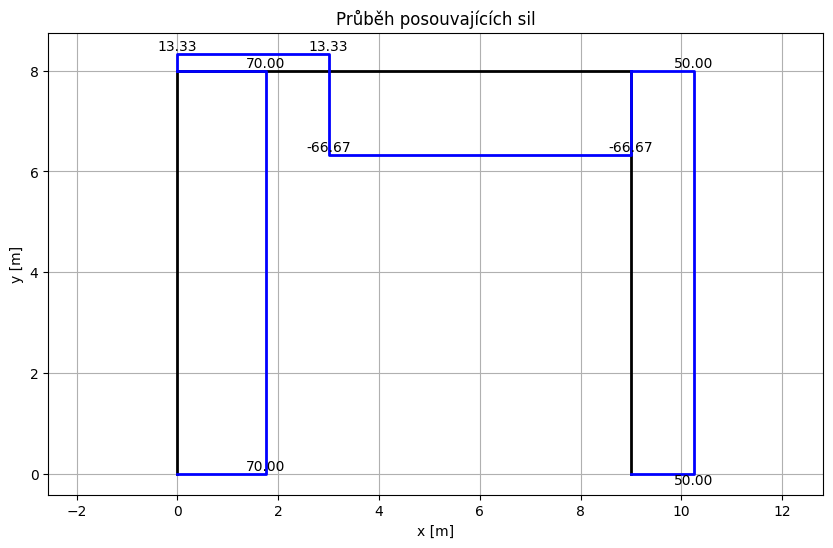

In [429]:
# Měřítko pro posouvající síly
force_scale = 40  # pouze pro vykreslení

# Vykreslení prutů (černě)
plt.figure(figsize=(10, 6))

# Prut 1-2 (černá čára)
plt.plot([coordinates[1][0], coordinates[2][0]], [coordinates[1][1], coordinates[2][1]], 'k-', linewidth=2)
# Prut 2-3 (černá čára)
plt.plot([coordinates[2][0], coordinates[3][0]], [coordinates[2][1], coordinates[3][1]], 'k-', linewidth=2)
# Prut 3-4 (černá čára)
plt.plot([coordinates[3][0], coordinates[4][0]], [coordinates[3][1], coordinates[4][1]], 'k-', linewidth=2)
# Prut 4-5 (černá čára)
plt.plot([coordinates[4][0], coordinates[5][0]], [coordinates[4][1], coordinates[5][1]], 'k-', linewidth=2)

# Vykreslení posouvajících sil pro prut 12
# Spojení bodů pro posouvající síly mezi styčníky 1 a 2
x_values = [0, val_V12 / force_scale, val_V21 / force_scale, 0]
y_values = [0, 0, 8, 8]
plt.plot(x_values, y_values, 'b-', linewidth=2)  # Modrá čára pro posouvající síly

# Přidání hodnot k pořadnicím pro prut 12
plt.text(val_V12 / force_scale, 0, f'{val_V12:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(val_V21 / force_scale, 8, f'{val_V21:.2f}', fontsize=10, ha='center', va='bottom')

# Spojení bodů pro posouvající síly mezi styčníky 2 a 5 (na základě hodnot val_V23, val_V32, val_V34, val_V43)
x_values_2 = [0, 0, 3, 3, 9, 9]
y_values_2 = [8, 8 + val_V23 / force_scale, 8 + val_V32 / force_scale, 8 + val_V34 / force_scale, 8 + val_V43 / force_scale, 8]
plt.plot(x_values_2, y_values_2, 'b-', linewidth=2)  # Modrá čára pro posouvající síly

# Přidání hodnot k pořadnicím pro prut 23 a další
plt.text(0, 8 + val_V23 / force_scale, f'{val_V23:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(3, 8 + val_V32 / force_scale, f'{val_V32:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(3, 8 + val_V34 / force_scale, f'{val_V34:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(9, 8 + val_V43 / force_scale, f'{val_V43:.2f}', fontsize=10, ha='center', va='bottom')

# Spojení bodů pro posouvající síly mezi styčníky 4 a 5
x_values_3 = [9, 9 + val_V45 / force_scale, 9 + val_V54 / force_scale, 9]
y_values_3 = [8, 8, 0, 0]
plt.plot(x_values_3, y_values_3, 'b-', linewidth=2)  # Modrá čára pro posouvající síly

# Přidání hodnot k pořadnicím pro prut 45 a 54
plt.text(9 + val_V45 / force_scale, 8, f'{val_V45:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(9 + val_V54 / force_scale, 0, f'{val_V54:.2f}', fontsize=10, ha='center', va='top')

# Nastavení grafu
plt.title('Průběh posouvajících sil')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axis('equal')  # Zachování poměru os
plt.grid(True)
plt.show()


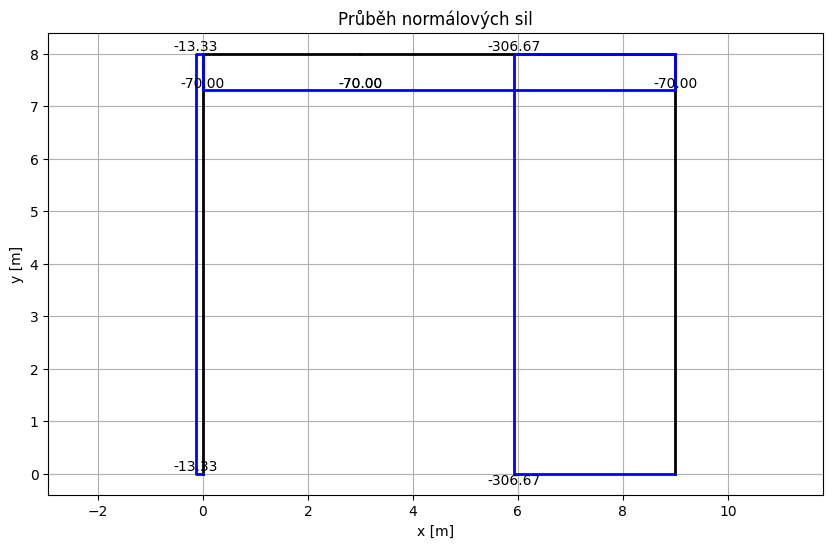

In [430]:
# Měřítko pro normálové síly
force_scale = 100

# Vykreslení prutů (černě)
plt.figure(figsize=(10, 6))

# Prut 1-2 (černá čára)
plt.plot([coordinates[1][0], coordinates[2][0]], [coordinates[1][1], coordinates[2][1]], 'k-', linewidth=2)
# Prut 2-3 (černá čára)
plt.plot([coordinates[2][0], coordinates[3][0]], [coordinates[2][1], coordinates[3][1]], 'k-', linewidth=2)
# Prut 3-4 (černá čára)
plt.plot([coordinates[3][0], coordinates[4][0]], [coordinates[3][1], coordinates[4][1]], 'k-', linewidth=2)
# Prut 4-5 (černá čára)
plt.plot([coordinates[4][0], coordinates[5][0]], [coordinates[4][1], coordinates[5][1]], 'k-', linewidth=2)

# Vykreslení normálových sil pro prut 12
# Spojení bodů pro normálové síly mezi styčníky 1 a 2
x_values = [0, val_N12 / force_scale, val_N21 / force_scale, 0]
y_values = [0, 0, 8, 8]
plt.plot(x_values, y_values, 'b-', linewidth=2)  # Modrá čára pro normálové síly

# Přidání hodnot k pořadnicím pro prut 12
plt.text(val_N12 / force_scale, 0, f'{val_N12:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(val_N21 / force_scale, 8, f'{val_N21:.2f}', fontsize=10, ha='center', va='bottom')

# Spojení bodů pro normálové síly mezi styčníky 2 a 5 (na základě hodnot val_N23, val_N32, val_N34, val_N43)
x_values_2 = [0, 0, 3, 3, 9, 9]
y_values_2 = [8, 8 + val_N23 / force_scale, 8 + val_N32 / force_scale, 8 + val_N34 / force_scale, 8 + val_N43 / force_scale, 8]
plt.plot(x_values_2, y_values_2, 'b-', linewidth=2)  # Modrá čára pro normálové síly

# Přidání hodnot k pořadnicím pro prut 23 a další
plt.text(0, 8 + val_N23 / force_scale, f'{val_N23:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(3, 8 + val_N32 / force_scale, f'{val_N32:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(3, 8 + val_N34 / force_scale, f'{val_N34:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(9, 8 + val_N43 / force_scale, f'{val_N43:.2f}', fontsize=10, ha='center', va='bottom')

# Spojení bodů pro normálové síly mezi styčníky 4 a 5
x_values_3 = [9, 9 + val_N45 / force_scale, 9 + val_N54 / force_scale, 9]
y_values_3 = [8, 8, 0, 0]
plt.plot(x_values_3, y_values_3, 'b-', linewidth=2)  # Modrá čára pro normálové síly

# Přidání hodnot k pořadnicím pro prut 45 a 54
plt.text(9 + val_N45 / force_scale, 8, f'{val_N45:.2f}', fontsize=10, ha='center', va='bottom')
plt.text(9 + val_N54 / force_scale, 0, f'{val_N54:.2f}', fontsize=10, ha='center', va='top')

# Nastavení grafu
plt.title('Průběh normálových sil')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axis('equal')  # Zachování poměru os
plt.grid(True)
plt.show()
